<a href="https://colab.research.google.com/github/fintekhab/CODSOFT/blob/main/Sales%20Prediction%20Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
pip install ydata_profiling

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import ydata_profiling
from ydata_profiling import ProfileReport

df = pd.read_csv(r"/content/advertising.csv")#importing file
print(df.head())#viewing first 5 elements
print(df.tail())#viewing last 5 elements

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9
        TV  Radio  Newspaper  Sales
195   38.2    3.7       13.8    7.6
196   94.2    4.9        8.1   14.0
197  177.0    9.3        6.4   14.8
198  283.6   42.0       66.2   25.5
199  232.1    8.6        8.7   18.4


In [22]:
print("\n We will first remove unnecessary values from data")
df_cleaned=df.dropna()#removing empty rows to proceed
plt.show(block = False)


 We will first remove unnecessary values from data


In [23]:

print("The Statistial Measures of Cleaned Data are: \n", df_cleaned.describe())


The Statistial Measures of Cleaned Data are: 
                TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [24]:
print("\n"+"The  spent maximum on TV is {} and the maximum earnt in sales is {}".format(max(df_cleaned['TV']), max(df_cleaned['Sales'])))



The  spent maximum on TV is 296.4 and the maximum earnt in sales is 27.0


In [25]:
profile = ProfileReport(df_cleaned)

In [26]:
profile.to_widgets()

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:524: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [27]:
profile.to_file('analysis1.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]





**We can observe how Sales and TV show strong correlation in the heat map.**

**Now we plot the graphs between the modes of advertisments and the corresponding Sales.**






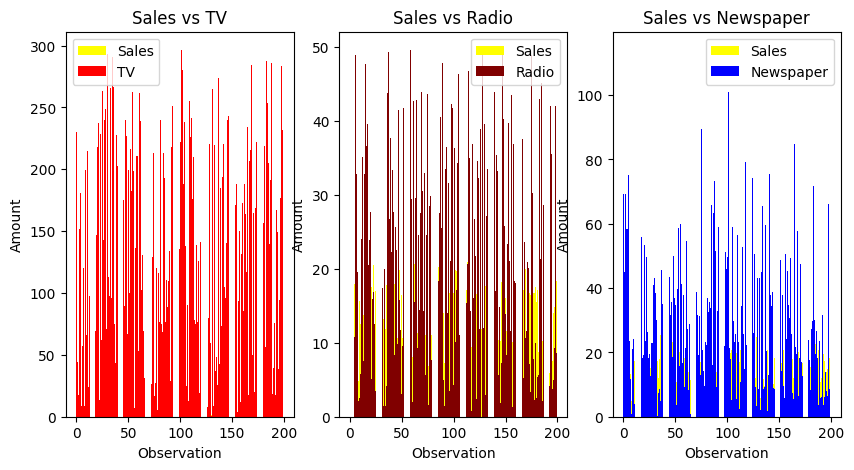

In [28]:
fig, axs = plt.subplots(1, 3, figsize = (10,5))
axs[0].bar(df_cleaned.index, df_cleaned['Sales'], color = 'yellow', label = 'Sales')
axs[0].bar(df_cleaned.index, df_cleaned['TV'], color = 'r', label = 'TV')
axs[0].set_title('Sales vs TV')
axs[0].set_xlabel('Observation')
axs[0].set_ylabel('Amount')
axs[0].legend()

axs[1].bar(df_cleaned.index,df_cleaned['Sales'], color = 'yellow', label ='Sales')
axs[1].bar(df_cleaned.index, df_cleaned['Radio'], color = 'maroon', label= 'Radio')
axs[1].set_title('Sales vs Radio')
axs[1].set_xlabel('Observation')
axs[1].set_ylabel('Amount')
axs[1].legend()

axs[2].bar(df_cleaned.index, df_cleaned['Sales'], color = 'yellow', label = 'Sales')
axs[2].bar(df_cleaned.index, df_cleaned['Newspaper'], color = 'b', label = 'Newspaper')
axs[2].set_title('Sales vs Newspaper')
axs[2].set_xlabel('Observation')
axs[2].set_ylabel('Amount')
axs[2].legend()

plt.show()

In [29]:
x = df_cleaned[['TV']]
y = df_cleaned['Sales']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model=LinearRegression()

model.fit(x_train,y_train)







LinearRegression()

In [30]:
model.score(x,y)

0.8121316219239643

**So, 81.21% is the accuracy of our model.**

In [31]:
model.predict([[150]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15.32955002])

**The above model predicts that for x = 150, the value of y = 15.33**

We try with another model.

In [32]:
x = df_cleaned[['TV', 'Radio']]
y = df_cleaned['Sales']

model.fit(x, y)




LinearRegression()

In [33]:
model.score(x,y)

0.9025896186081139

**So, this model is better than the previous model where we considered the impact of only TV. The accuracy of this model is 90.2589%.**

In [34]:
x = df_cleaned[['TV', 'Radio', 'Newspaper']]
y = df_cleaned['Sales']

model.fit(x,y)

LinearRegression()

In [35]:
model.score(x,y)

0.9025912899684558

 **The accuracy of the third model is 90.2591.
Hence, the third model is the best.**


In [36]:
model.predict([[30, 50, 90]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11.63876811])

**Done!**